# Data Preprocessing
---

Data Preprocessing is critical first step in data analysis. It provide valuble insight of data and its relation.

Following objectives are accomplished in this file:

### 1. Checked for  Missing values
### 2. Performed Feature Selection  and transformed the data 


In [40]:
# import libraries

import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import math

In [41]:
# Ignore Warnings 
warnings.filterwarnings("ignore")

#to see all the columns
pd.set_option('display.max_columns',30) 

### Read Data

In [67]:
# read the data
train = pd.read_csv("PA1_train.csv")
dev = pd.read_csv("PA1_dev.csv")

In [68]:
# Removing the ID feature :
train.drop('id',axis=1,inplace=True)
dev.drop('id',axis=1,inplace=True)

In [69]:
# split date to month day and year
for i in [train,dev]:
    i['month'] = i.date.map(lambda x : int(x.split('/')[0]))
    i['day'] = i.date.map(lambda x : int(x.split('/')[1]))
    i['year'] = i.date.map(lambda x : int(x.split('/')[2]))
    i.drop('date',axis=1,inplace=True)

In [70]:
# adding an additional features
train['yr_dif']=train['year']-train['yr_built']
dev['yr_dif']=dev['year']-dev['yr_built']


In [71]:
# view
train.head(5)

,dummy,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,month,day,year,yr_dif
0,1,4,2.50,2720,10006,2.0,0,0,3,9,2720,0,1989,0,98074,47.6295,-122.042,2720,10759,5.9495,7,9,2014,25
1,1,2,2.50,2600,5000,1.0,0,0,5,8,1300,1300,1926,0,98126,47.5806,-122.379,2260,5000,6.6500,7,18,2014,88
2,1,5,1.75,1650,3000,1.5,0,0,3,8,1650,0,1902,0,98144,47.5955,-122.306,1740,4000,4.4300,7,7,2014,112
3,1,4,1.75,1720,9600,1.0,0,0,4,8,1720,0,1969,0,98059,47.4764,-122.155,1660,10720,3.8000,4,28,2015,46
4,1,6,2.25,3830,11180,1.0,0,2,5,9,2440,1390,1962,0,98008,47.5849,-122.113,2500,10400,8.8700,9,4,2014,52


In [72]:
train.columns

Index(['dummy', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price', 'month', 'day', 'year',
       'yr_dif'],
      dtype='object')

In [73]:
# Build tables (statistics)
features = ['dummy', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price', 'month', 'day', 'year',
       'yr_dif']

num = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 
       'sqft_above','sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price', 'day',
       'yr_dif']

cat = ['floors','waterfront', 'view', 'condition', 'grade','month', 'year']

table1 = pd.DataFrame({'Feature':num,'Mean':train[num].mean(),'Max':train[num].max(),'Min':train[num].min(),\
              'Standard deviation':train[num].std(),\
             'Range':train[num].max()-train[num].min()})
table1

,Feature,Mean,Max,Min,Standard deviation,Range
bedrooms,bedrooms,3.375200,3.300000e+01,1.0000,0.943246,3.200000e+01
bathrooms,bathrooms,2.118875,7.750000e+00,0.5000,0.765128,7.250000e+00
sqft_living,sqft_living,2080.223200,9.890000e+03,370.0000,911.334358,9.520000e+03
sqft_lot,sqft_lot,15089.201400,1.651359e+06,572.0000,41203.894918,1.650787e+06
sqft_above,sqft_above,1793.099300,8.860000e+03,370.0000,830.865434,8.490000e+03
sqft_basement,sqft_basement,287.123900,2.720000e+03,0.0000,435.005264,2.720000e+03
yr_built,yr_built,1971.124900,2.015000e+03,1900.0000,29.480594,1.150000e+02
yr_renovated,yr_renovated,81.226700,2.015000e+03,0.0000,394.379804,2.015000e+03
zipcode,zipcode,98078.293100,9.819900e+04,98001.0000,53.518391,1.980000e+02
lat,lat,47.559814,4.777760e+01,47.1559,0.138651,6.217000e-01


In [74]:
# categorical feature analysis

d = {}
for i in cat:
    n = train[cat].nunique().max()-train[cat].nunique()[i]
    d[i.capitalize()+ " categories"] = list(train[i].value_counts(normalize=True).index)+[' ']*n
    d[i+" %"] = list(train[i].value_counts(normalize=True)*100)+[' ']*n
table2 = pd.DataFrame(d)
#table1.to_excel('table1.xlsx',index=False)# in report
#table2.to_excel('table2.xlsx',index=False)# in report
table2

,Floors categories,floors %,Waterfront categories,waterfront %,View categories,view %,Condition categories,condition %,Grade categories,grade %,Month categories,month %,Year categories,year %
0,1.0,48.59,0,99.3,0,90.3,3,65.3,7,41.3,5,11.23,2014,68.15
1,2.0,38.68,1,0.7,2,4.25,4,25.69,8,28.38,7,10.37,2015,31.85
2,1.5,8.93,,,3,2.5,5,8.12,9,11.82,6,10.30,,
3,3.0,2.99,,,1,1.62,2,0.76,6,9.33,4,10.08,,
4,2.5,0.78,,,4,1.33,1,0.13,10,5.47,10,8.87,,
5,3.5,0.03,,,,,,,11,2.1,8,8.74,,
6,,,,,,,,,5,1.05,3,8.46,,
7,,,,,,,,,12,0.39,9,8.38,,
8,,,,,,,,,4,0.11,12,6.84,,
9,,,,,,,,,13,0.05,11,6.44,,


# Check for missing values

In [30]:
# missing values in train
train.isnull().sum()

dummy            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
month            0
day              0
year             0
dtype: int64

In [31]:
# missing value in devlopment set
dev.isnull().sum()

dummy            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
month            0
day              0
year             0
dtype: int64

# Feature Selection

1. Graphical Analysis
2. Abalation Analysis
3. Correlation matrix

## 1. Graphical Analysis

- In this analysis, we explore histogram and scattered plot. 
- From Scatter plot, highly non-linearly realted features can be dropped.
- From Histogram, we check for skewness in data or unbalanced categorical data. 

These analysis provide better insight of features. 

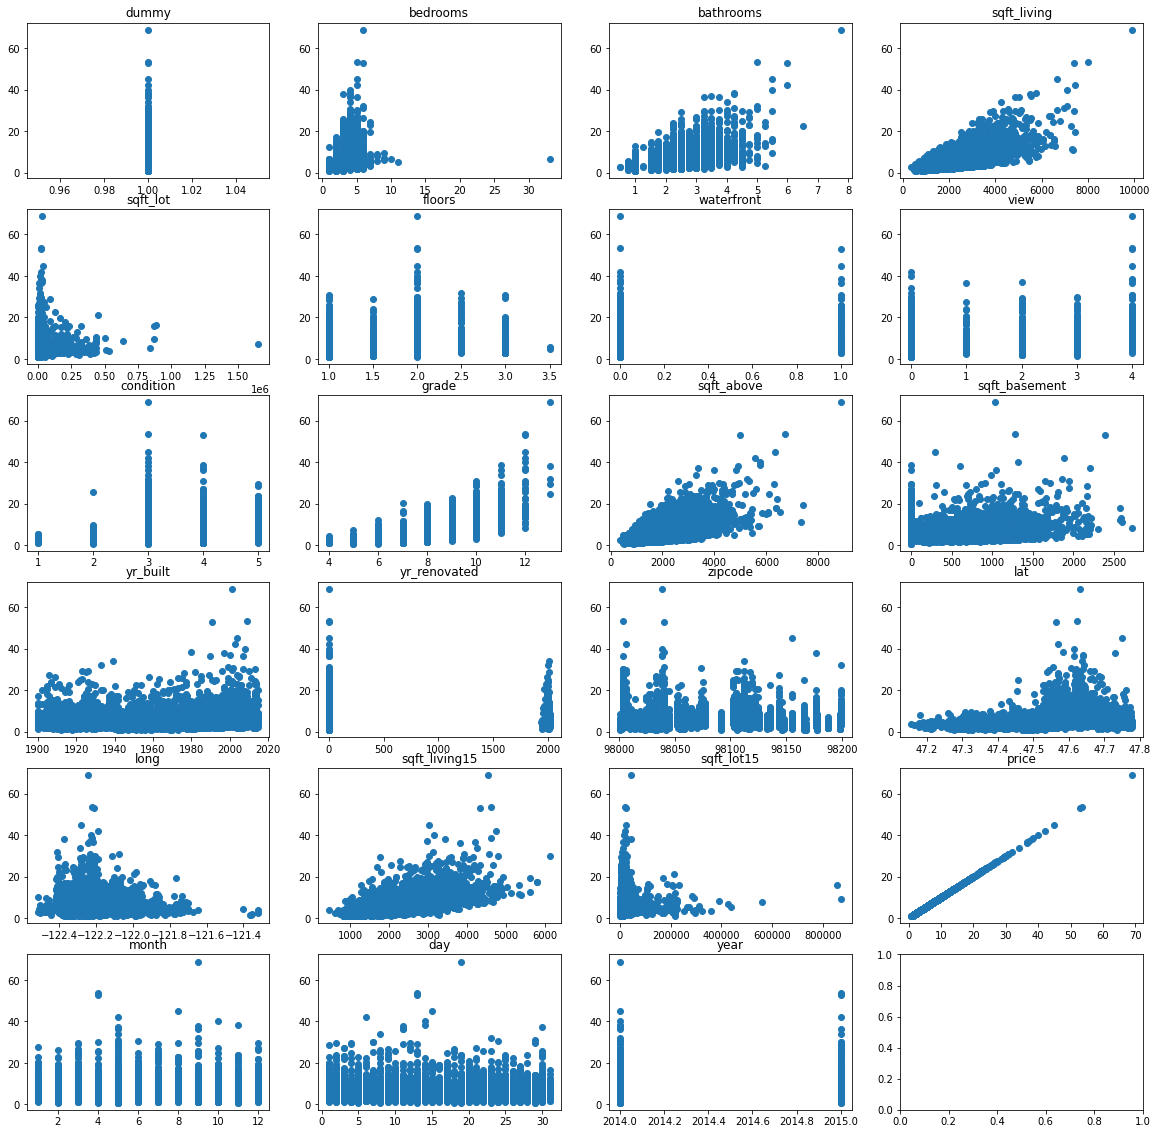

In [18]:
fig,ax=plt.subplots(math.ceil(len(train.columns)/4),4,figsize=(20,20))
row=0
col=0
for i in train.columns:
    ax[row,col].scatter(train[i],train['price'])
    ax[row,col].set_title(i)
    col+=1
    if col==4:
        row+=1
        col=0

plt.savefig('./images/Scatter_plot.png', dpi=600)
    

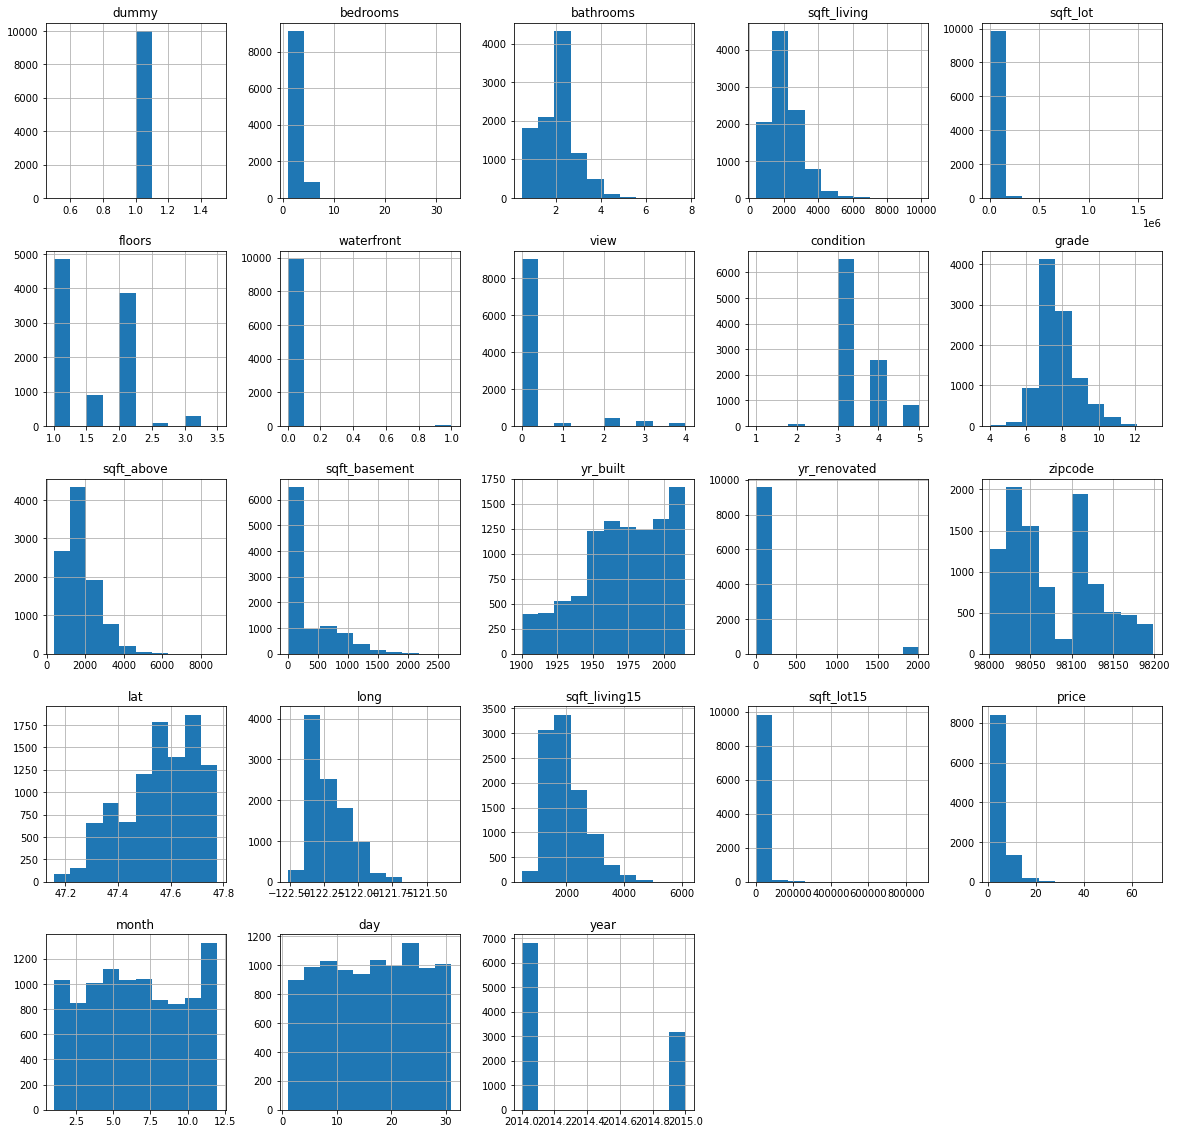

In [22]:
# histogram of all colums
train.hist(figsize=(20,20))
plt.savefig('./images/histograms.png', dpi=600)
    

## Remove Outliers


In [99]:
num1 = ['bedrooms', 'sqft_living', 'sqft_lot', 
       'sqft_above','sqft_basement','sqft_living15', 'sqft_lot15']

l={}
h={}

for i in num1:
    l[i]=train[i].quantile(0.025)
    h[i]=train[i].quantile(0.975)

for i in num1:
    train= train[(train[i] <= h[i]) & (train[i] >=l[i])] # inplace removal of outliers

train.shape

{'bedrooms': 2.0, 'sqft_living': 830.0, 'sqft_lot': 1240.9250000000002, 'sqft_above': 770.0, 'sqft_basement': 0.0, 'sqft_living15': 1040.0, 'sqft_lot15': 1349.975} {'bedrooms': 5.0, 'sqft_living': 4270.0, 'sqft_lot': 85408.47499999954, 'sqft_above': 3810.0, 'sqft_basement': 1380.0, 'sqft_living15': 3690.0, 'sqft_lot15': 60569.77499999968}


(8183, 24)

array([[<AxesSubplot:title={'center':'dummy'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'sqft_living'}>,
        <AxesSubplot:title={'center':'sqft_lot'}>],
       [<AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>,
        <AxesSubplot:title={'center':'view'}>,
        <AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'grade'}>],
       [<AxesSubplot:title={'center':'sqft_above'}>,
        <AxesSubplot:title={'center':'sqft_basement'}>,
        <AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'zipcode'}>],
       [<AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'long'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'center':'sqft_lot15'}>,
        <AxesSubplot:titl

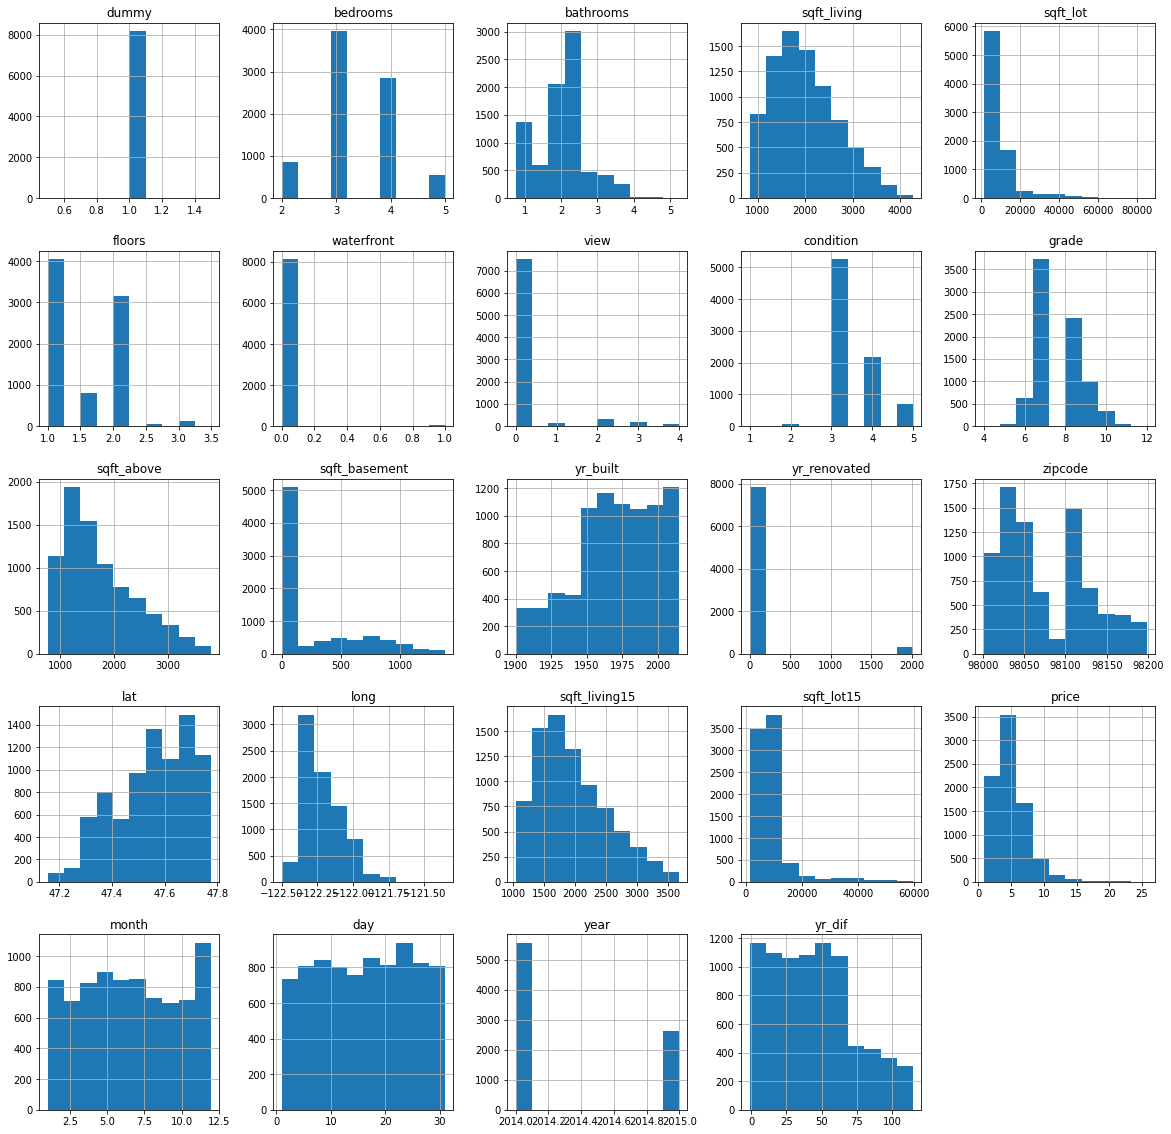

In [100]:
train1.hist(figsize=(20,20))

## Abalation analysis

- __Base Case:__ No feature is dropped.
- Drop features one by one and record regression accuracy. This is known as "Ablation Analysis".
- Many features are correlated. Therfore, we can not reject features based on Abalation analysis. It gives us features which are very important and can cause significant drop in accuracy if not included.


In [101]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

# X and Y
Y_train=train['price']
X_train=train.loc[:,~train.columns.isin(['price','dummy'])]


X_dev=dev.loc[:,~dev.columns.isin(['price','dummy'])]
Y_dev=dev['price']

# Ridge REgression model with 
reg=linear_model.Ridge(alpha=0.5)
# reg=linear_model.Lasso(alpha=0.01)

result={}

# without individual drop of features
normalization=preprocessing.StandardScaler().fit(X_train.loc[:,~X_train.columns.isin(['dummy'])])
# normalization=preprocessing.MinMaxScaler().fit(X_train.loc[:,~X_train.columns.isin(['dummy'])])

X_train_norm=normalization.transform(X_train.loc[:,~X_train.columns.isin(['dummy'])])
X_dev_norm=normalization.transform(X_dev.loc[:,~X_dev.columns.isin(['dummy'])])
reg.fit(X_train_norm,np.log(Y_train))
result['None']=reg.score(X_dev_norm,np.log(Y_dev))
    
for i in X_train.columns[~X_train.columns.isin(['dummy'])]:
    # Normalization
    normalization=preprocessing.StandardScaler().fit(X_train.loc[:,~X_train.columns.isin(['dummy',i])])
    # normalizing train/dev
    X_train_norm=normalization.transform(X_train.loc[:,~X_train.columns.isin(['dummy',i])])
    X_dev_norm=normalization.transform(X_dev.loc[:,~X_dev.columns.isin(['dummy',i])])

    reg.fit(X_train_norm,np.log(Y_train))
    result[i]=reg.score(X_dev_norm,np.log(Y_dev))

result=pd.DataFrame(result,index=['Performance']).T # transpose

In [102]:
result.round(5)

,Performance
None,0.75053
bedrooms,0.74935
bathrooms,0.74207
sqft_living,0.75053
sqft_lot,0.75099
floors,0.73737
waterfront,0.75343
view,0.74149
condition,0.74990
grade,0.71858


## 3. Correlation matrix

- compute correlation matrix
- using Seaborn's heatmap, determine highly correlated features

<AxesSubplot:>

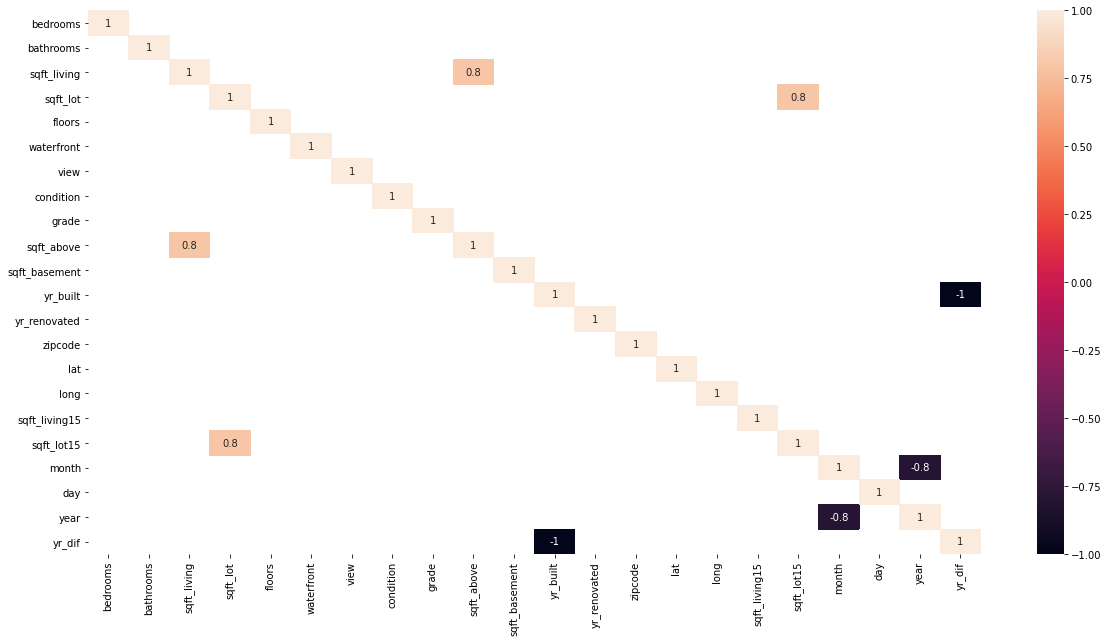

In [105]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(20,10))
corr = X_train.corr()
korr = corr[abs(corr)>=.75]
sns.heatmap(korr.round(1),annot=True, ax=ax)#, mask = (np.abs(correlation) >= 0.8))
# plt.savefig('./images/correlation.png', dpi=600)
# plt.figure(figsize=(10,10))

## Conclusion:

- Based on __abalation analysis__ , 'lat' is found to be one of the most important feature. Without 'lat', the accuracy of linear regression model drops significanlty.

- based on __Correlation matrix__, 'sqft_living' is highly correlated with 'sqft_living15', 'sqft_above', 'grade' and bathrooms. and dropping this feature does not causes loss of accuracy.

- Drop either 'sqft_lot' or 'sqft_lot15'. The variance of sqft_lot15 is very high from scatter plot. Therefore, I drop 'sqft_lot15'.

- grade and sqft_above are correalted to 0.8 . There is significant decrease in accuracy if grade is dropped. But, scatter plot shows both of them having good relation with price. Lets keep both of them.

- yr_diff is computed from yr_built. Based on domain knowledge, yr_built, year are important. Therefore yr_diff may not be needed.   


### Drop these features :  sqft_living ,  sqft_lot15, yr_dif, year, 

In [48]:
# drop features
train.drop(['sqft_living','sqft_lot15','yr_dif'], axis=1, inplace=True)
dev.drop(['sqft_living','sqft_lot15','yr_dif'], axis=1, inplace=True)
dev.shape

(5597, 21)

In [51]:
# save them in excel
train.to_csv("filtered_train.csv", index=False)
dev.to_csv("filtered_dev.csv", index=False)